# Explore here

In [43]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from neuralprophet import NeuralProphet
from sklearn.metrics import r2_score, mean_absolute_error
import warnings

In [9]:
raw_df = pd.read_csv(r'../data/raw/River_Arno.csv', index_col='Date', parse_dates=True, date_format=r'%d/%m/%Y')
## data available in https://www.kaggle.com/competitions/acea-water-prediction/data?select=River_Arno.csv

# Data overview

In [10]:
raw_df

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
2020-06-27,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
2020-06-28,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30


In [11]:
null_h = raw_df['Hydrometry_Nave_di_Rosano'].isnull().sum()
print(f'{null_h} missing hydrometry values')

48 missing hydrometry values


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8217 entries, 1998-01-01 to 2020-06-30
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_Le_Croci          6026 non-null   float64
 1   Rainfall_Cavallina         6026 non-null   float64
 2   Rainfall_S_Agata           6026 non-null   float64
 3   Rainfall_Mangona           6026 non-null   float64
 4   Rainfall_S_Piero           6026 non-null   float64
 5   Rainfall_Vernio            4283 non-null   float64
 6   Rainfall_Stia              1283 non-null   float64
 7   Rainfall_Consuma           1283 non-null   float64
 8   Rainfall_Incisa            4568 non-null   float64
 9   Rainfall_Montevarchi       1647 non-null   float64
 10  Rainfall_S_Savino          1283 non-null   float64
 11  Rainfall_Laterina          1283 non-null   float64
 12  Rainfall_Bibbiena          2378 non-null   float64
 13  Rainfall_Camaldoli         128

In [45]:
raw_df.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,4283.000000,1283.000000,1283.000000,4568.000000,1647.000000,1283.00000,1283.000000,2378.000000,1283.000000,6192.000000,8169.000000
mean,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.416680,2.335026,2.056709,2.42650,2.101949,2.640959,3.826968,16.605386,1.472407
std,8.025121,7.655847,7.166643,8.903134,6.650012,9.425358,6.502917,8.938863,6.347652,6.117967,7.23414,6.377879,7.161416,9.591337,7.458951,0.616259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.650000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.350000,1.300000
75%,1.200000,0.600000,1.200000,1.400000,0.800000,1.200000,1.000000,2.200000,0.800000,0.600000,0.70000,0.400000,1.200000,2.400000,22.700000,1.690000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,63.000000,114.400000,102.200000,75.000000,123.20000,95.600000,77.400000,103.600000,34.900000,6.750000


# Time series analysis

## Missing data

Since we have some missing data on the variable we want to predict, we will first fill those values with a linear interpolation. 
Also since we have a lot of data but in my case very limited computing power I choose to only work with the data after 2010, this should help to make the plots easier to understand too.

In [13]:
gt_2010_mask = (raw_df.index>=datetime(2010,1,1)) # data after 2010
ts = raw_df.loc[gt_2010_mask, 'Hydrometry_Nave_di_Rosano'].copy()
ts.interpolate(method='linear', inplace=True)
ts = ts.resample('W').mean()

## Seasonal decomposition analysis

### figure 1

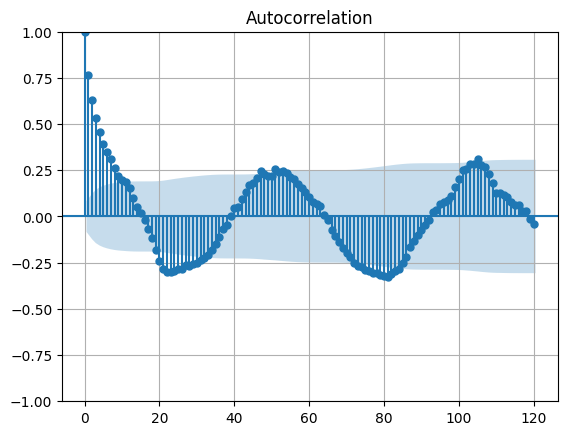

In [14]:
plot_acf(ts, lags=120)
plt.grid(True)

plt.show()

### figure 2

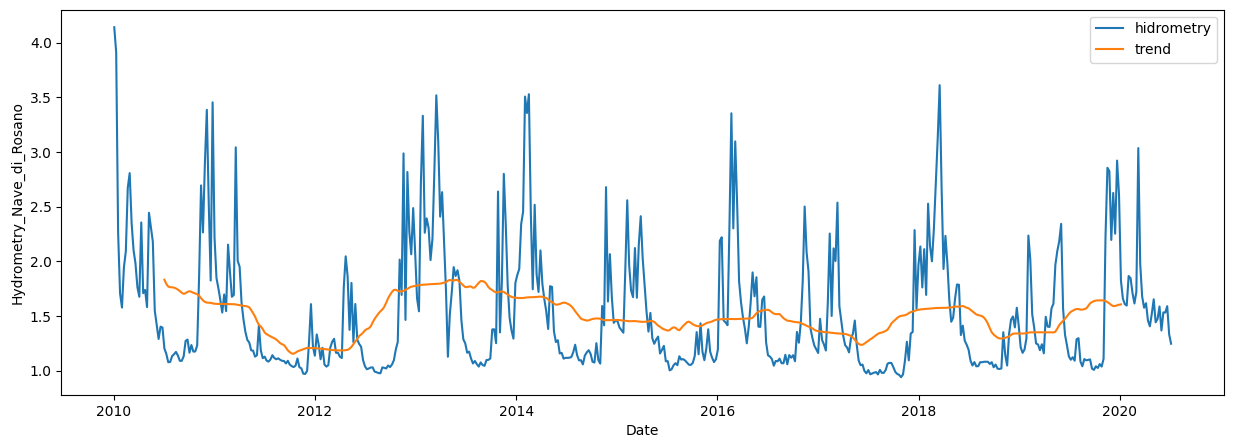

In [15]:
decomposition = seasonal_decompose(ts, period = 52)

plt.figure(figsize=(15,5))
sns.lineplot(ts, label='hidrometry')
sns.lineplot(decomposition.trend, label='trend')
plt.show()

### figure 3

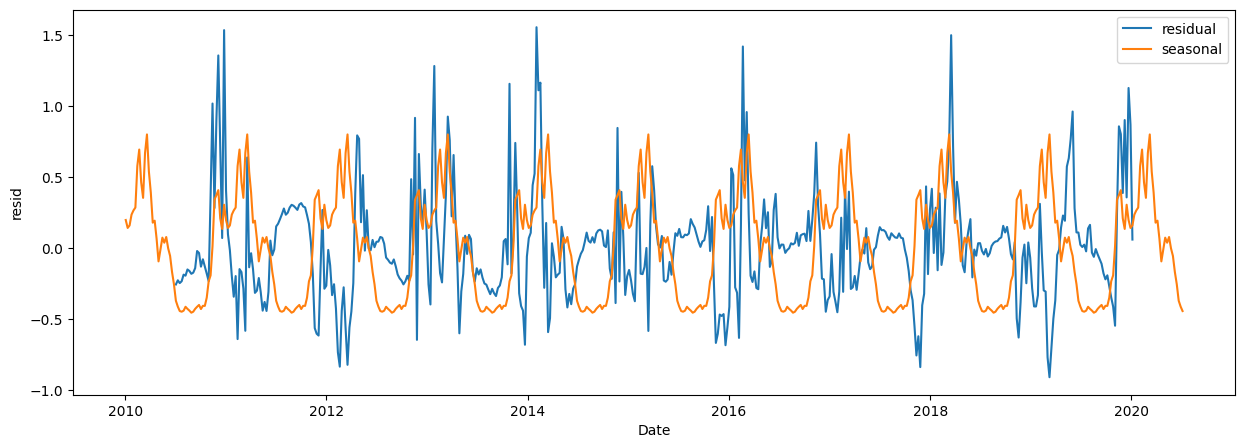

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(decomposition.resid, label='residual')
sns.lineplot(decomposition.seasonal, label='seasonal')
plt.show()

## Stationary analysis

In [17]:
print(f'Dickey-Fuller test p-value: {adfuller(ts)[1]}')

Dickey-Fuller test p-value: 1.4101742819603746e-11


## Time series analysis

- we can see there is annual seasonality (fig 1).
- This time the data does not have a clear trend (fig 2).
- we choose a weekly period but that might not be the best choice since we can see some pattern in the residual that was not absorbed by the seasonal component. We will stick to this period since my computing power is pretty bad.
- we can see that according to our Dickey-Fuller test, our series is stationary.

# Model creation

## ARIMA model

In [18]:
warnings.filterwarnings('ignore')
model = auto_arima(ts, seasonal=True, m=52, trace=True, random_state=42, d=0)
warnings.filterwarnings('default')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=21.39 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=938.815, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=425.396, Time=8.10 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=646.322, Time=3.33 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2097.554, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=423.923, Time=0.22 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=425.347, Time=5.87 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=11.08 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=416.865, Time=0.25 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=417.914, Time=11.46 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=417.877, Time=4.87 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=16.09 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=418.829, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=418.820, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : A

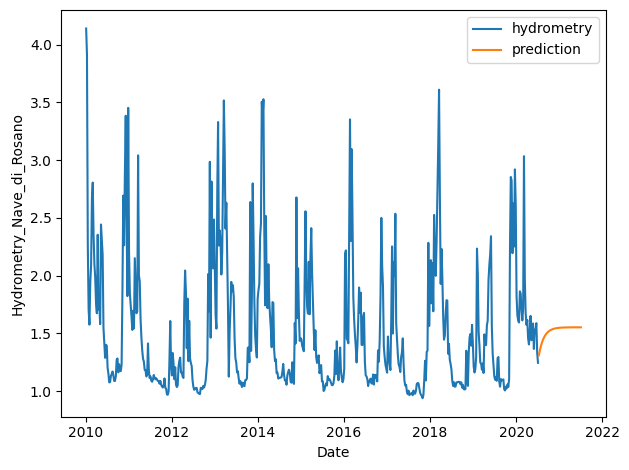

In [21]:
warnings.filterwarnings('ignore')
predict = model.predict(52)
warnings.filterwarnings('default')

sns.lineplot(data=ts, label='hydrometry')
sns.lineplot(data=predict, label='prediction')

plt.tight_layout()
plt.show()

## ARIMA model conclusions

- Although we did not separate data for validation, we can see from the plot that this model was not very effective since it clearly missed the seasonal component. 

## Neural prophet model

### data prep

Since this model is has a lower computational cost to train we will use the whole dataset for this one with a daily frequency.

In [35]:
ts_np = pd.DataFrame(raw_df['Hydrometry_Nave_di_Rosano'].copy())
ts_np.interpolate(method='linear', inplace=True)
ts_np.reset_index(names='ds', inplace=True)
ts_np.rename({'Hydrometry_Nave_di_Rosano':'y'}, axis=1, inplace=True)

train_np = ts_np.iloc[:-365,:] # previous to last year
validation_np = ts_np.iloc[-365:,:] # last year
train_np

,ds,y
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
7847,2019-06-27,1.19
7848,2019-06-28,1.10
7849,2019-06-29,1.11
7850,2019-06-30,1.07


In [36]:
warnings.filterwarnings('ignore')

neural_model = NeuralProphet()
metrics = neural_model.fit(train_np, freq='D')
pred_df = neural_model.make_future_dataframe(train_np, periods=365)
pred_df = neural_model.predict(pred_df)

warnings.filterwarnings('default')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.987% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 60
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (123) is too small than the required number                     for the learning rate finder (247). The results might not be optimal.


Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.987% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 123it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [37]:
pred_df

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2019-07-02,None,0.951566,1.274218,-0.333816,0.011164
1,2019-07-03,None,0.937421,1.274054,-0.339078,0.002445
2,2019-07-04,None,0.932433,1.273890,-0.344088,0.002631
3,2019-07-05,None,0.933325,1.273725,-0.348886,0.008485
4,2019-07-06,None,0.921219,1.273561,-0.353465,0.001123
...,...,...,...,...,...,...
360,2020-06-26,None,0.921597,1.215043,-0.301953,0.008508
361,2020-06-27,None,0.907421,1.214878,-0.308612,0.001155
362,2020-06-28,None,0.870189,1.214714,-0.314985,-0.029540
363,2020-06-29,None,0.897175,1.214550,-0.321070,0.003696


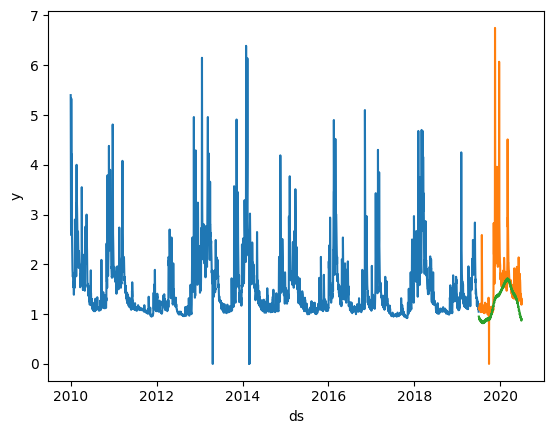

In [40]:
gt_2010_mask = (train_np.ds>=datetime(2010,1,1)) # data after 2010

sns.lineplot(train_np[gt_2010_mask], x='ds', y='y')
sns.lineplot(validation_np, x='ds', y='y')
sns.lineplot(pred_df, x='ds',y='yhat1')
plt.show()

In [44]:
ypred = pred_df.yhat1
r2 = r2_score(validation_np.y, ypred)
mse = mean_absolute_error(validation_np.y, ypred)

print(f'r\u00b2 score: {r2:.3}')
print(f'mean absolute error: {mse:.3}')

r² score: -0.054
mean absolute error: 0.381


## Neural prophet conclusions

our $r^2$ score is terrible, but our mean absolute error is better. Since the average hydrometry value goes around 1.5, that means our predictions are on average 25% away of the actual value, which for a time series with such noise is not that bad.

# saving the model

In [47]:
from pickle import dump

path = '../models/' + 'neural_prophet' + '.sav'
dump(neural_model, open(path, 'wb'))

WARNING - (py.warnings._showwarnmsg) - C:\Users\shade\AppData\Local\Temp\ipykernel_6776\1921827531.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='../models/neural_prophet.sav'>
  dump(neural_model, open(path, 'wb'))

